In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas_profiling as pp

<ipython-input-5-e5da90217ff1>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


# 1.  Defining Problem Statement and Analyzing basic metrics


    Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female)

In [6]:
df=pd.read_csv("walmart_data.csv")

In [11]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
print(df.shape)

(550068, 10)


In [4]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [113]:
groupedDf["Purchase"].describe(percentiles=[.25, .5, .75])

count    5.891000e+03
mean     8.650166e+05
std      9.436445e+05
min      4.668100e+04
25%      2.376780e+05
50%      5.212130e+05
75%      1.119250e+06
max      1.053691e+07
Name: Purchase, dtype: float64

## 1.2 Non-Graphical Analysis: Value counts and unique attributes 

In [7]:
#unique values in columns
for i in df.columns:
    print(i,df[i].nunique())

User_ID 5891
Product_ID 3631
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category 20
Purchase 18105


In [8]:
#value counts for columns

In [9]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [210]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [211]:
df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [212]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [213]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [214]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [215]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

### unique attributes count

In [26]:
for i in df.columns:
    print(i)
    print("unique attributes:",df[i].nunique())
    df_col=df[i].value_counts().reset_index()
    df_col.columns=[i,"count"]
    print(df_col)
    print("------------------------")
    print("------------------------")

User_ID
unique attributes: 5891
      User_ID  count
0     1001680   1026
1     1004277    979
2     1001941    898
3     1001181    862
4     1000889    823
...       ...    ...
5886  1000094      7
5887  1002111      7
5888  1004991      7
5889  1005608      7
5890  1000708      6

[5891 rows x 2 columns]
------------------------
------------------------
Product_ID
unique attributes: 3631
     Product_ID  count
0     P00265242   1880
1     P00025442   1615
2     P00110742   1612
3     P00112142   1562
4     P00057642   1470
...         ...    ...
3626  P00135942      1
3627  P00203642      1
3628  P00066342      1
3629  P00057842      1
3630  P00081642      1

[3631 rows x 2 columns]
------------------------
------------------------
Gender
unique attributes: 2
  Gender   count
0      M  414259
1      F  135809
------------------------
------------------------
Age
unique attributes: 7
     Age   count
0  26-35  219587
1  36-45  110013
2  18-25   99660
3  46-50   45701
4  51-55   38501

# 1.3 Visual Analysis - Univariate & Bivariate

    For continuous variable(s): Distplot, countplot, histogram for univariate analysis
    For categorical variable(s): Boxplot
    For correlation: Heatmaps, Pairplots


In [4]:
def getDistplot(df,colName):
    plt.figure(figsize=(10,5))
    sns.distplot(df[colName],norm_hist=True)
    plt.grid()
    plt.title("Distribution of count by {}".format(colName))
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

def getcountplot(df,colName):
    plt.figure(figsize=(10,5))
    sns.countplot(x=df[colName],data=df,order=df[colName].value_counts().index)
    plt.grid()
    plt.title("Count by {}".format(colName))
#     plt.ticklabel_format(style='plain', axis='x')
#     plt.ticklabel_format(style='plain', axis='y')
    plt.show()
    
def gethistplot(df,colName,hue,bins="auto"):
    plt.figure(figsize=(20,5))
    sns.histplot(x=colName,data=df,bins=bins,hue=hue)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid()
    plt.show()

In [7]:
groupedDf=df.groupby(["User_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status"])["Purchase"].sum().reset_index()

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


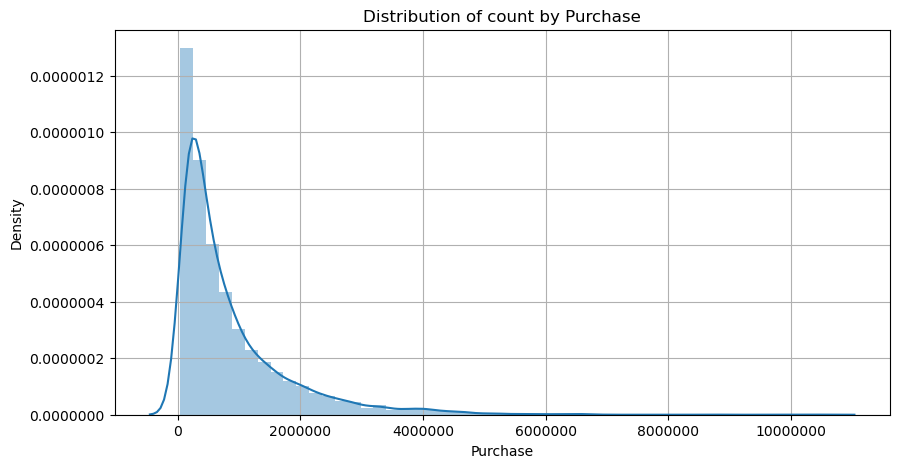

In [6]:
getDistplot(groupedDf,"Purchase")

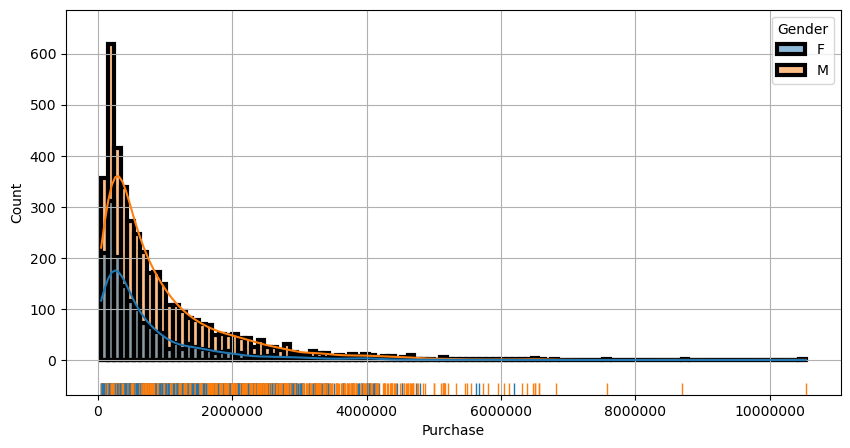

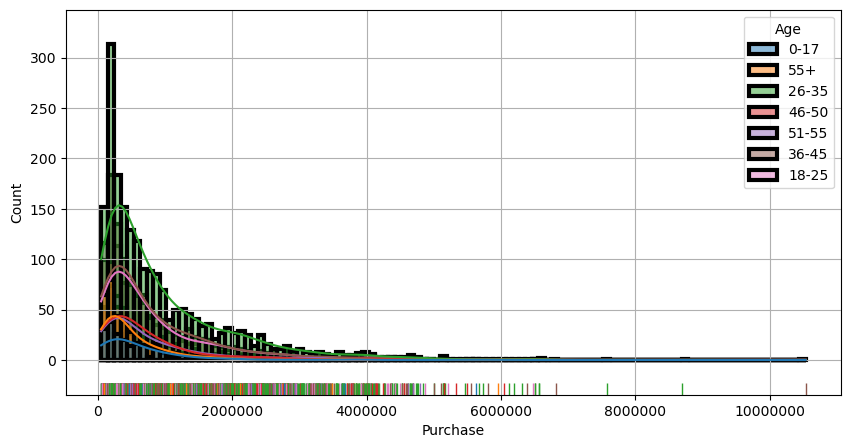

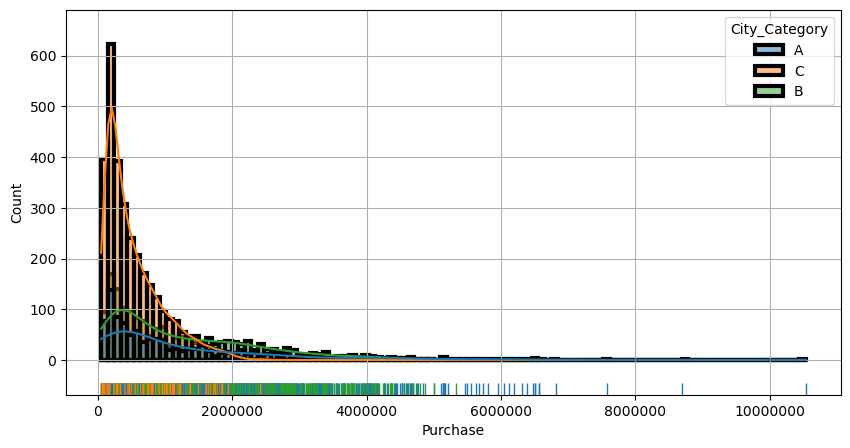

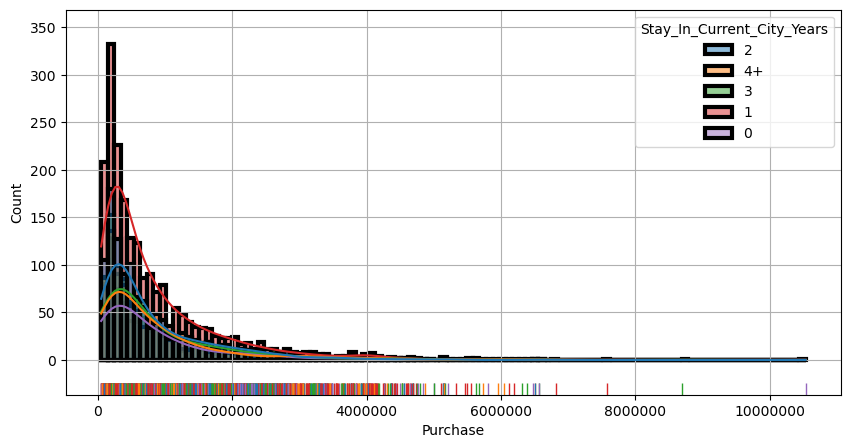

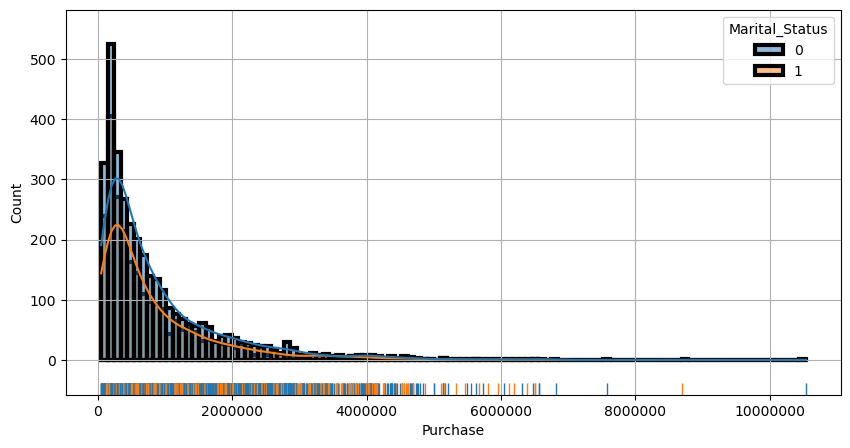

In [11]:
for i in ["Gender","Age","City_Category","Stay_In_Current_City_Years","Marital_Status"]:
    plt.figure(figsize=(10,5))
    sns.rugplot(x='Purchase', data=groupedDf, height=.03, color='darkblue',hue=i)
    sns.histplot(x='Purchase', data=groupedDf, kde=True,hue=i,linewidth=3)
    plt.ticklabel_format(style='plain', axis='x')
    plt.grid()
    plt.show()

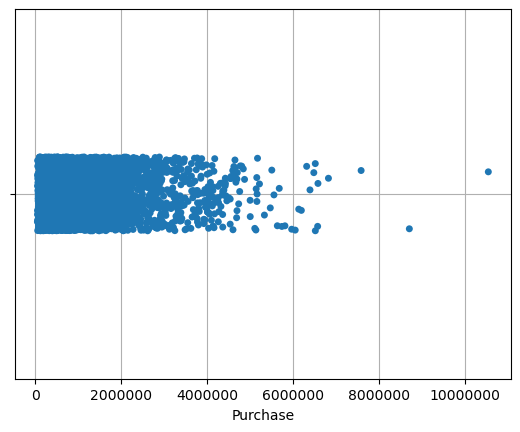

In [125]:
sns.stripplot(x="Purchase",data=groupedDf,hue="Gender")
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.show()

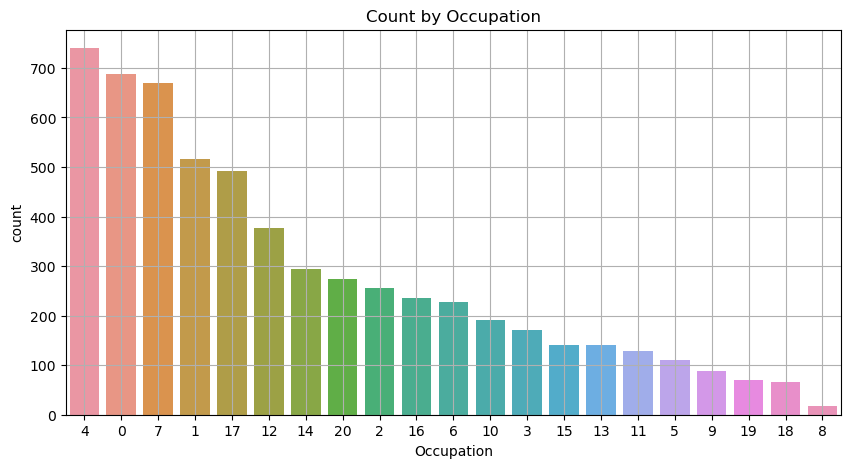

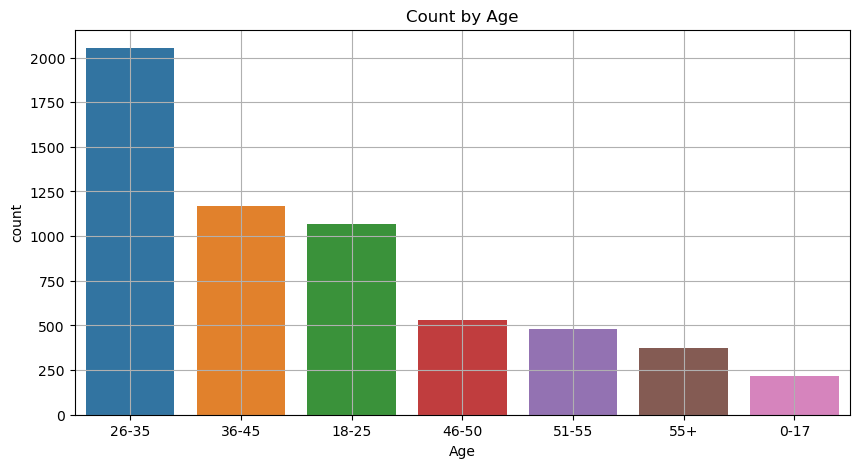

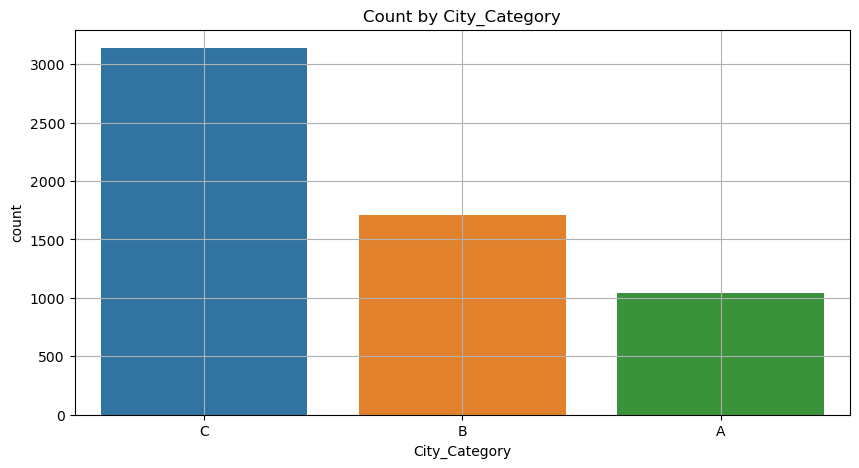

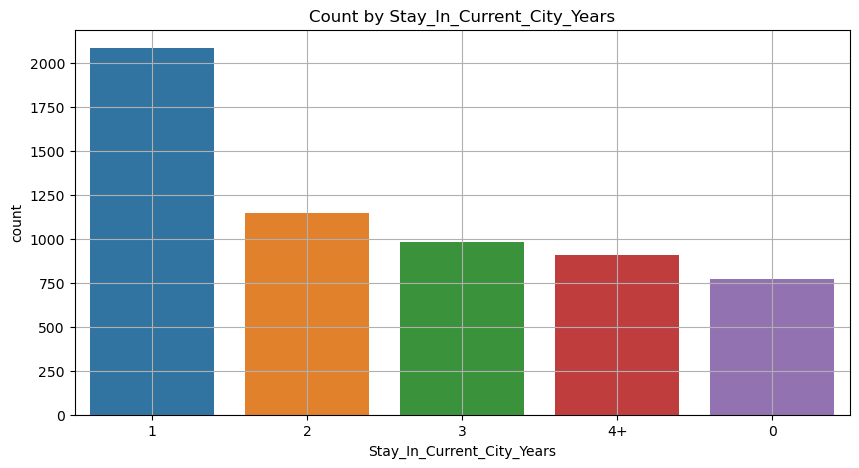

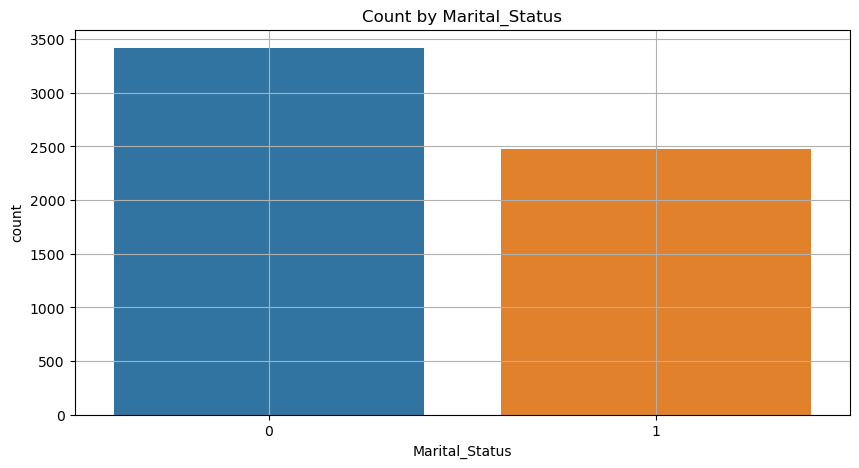

In [108]:
groupedDf=df.groupby(["User_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status"])["Purchase"].sum().reset_index()
for i in ["Occupation","Age","City_Category","Stay_In_Current_City_Years","Marital_Status"]:
    getcountplot(groupedDf,i)

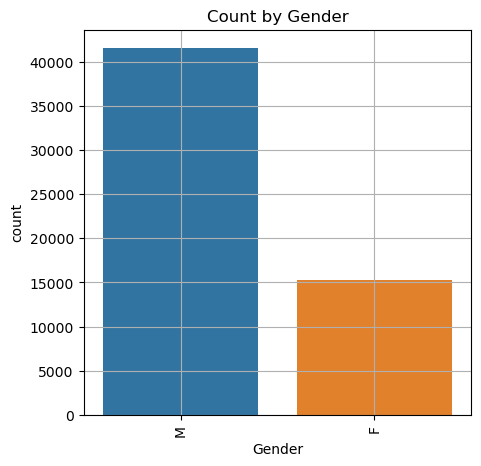

In [20]:
getcountplot(groupedDf,"Gender")

### categorical attributes to 'category'

In [22]:
dfcopy=groupedDf.copy()
dfcopy["Gender"].replace(["M","F"],[0,1],inplace=True)
dfcopy["Age"].replace(["0-17","18-25","26-35","36-45","46-50","51-55","55+"],[0,1,2,3,4,5,6],inplace=True)
dfcopy["City_Category"].replace(["A","B","C"],[0,1,2],inplace=True)
dfcopy["Stay_In_Current_City_Years"].replace(["0","1","2","3","4","4+"],[0,1,2,3,4,5],inplace=True)

In [23]:
dfcopy.dtypes

User_ID                       int64
Gender                        int64
Age                           int64
Occupation                    int64
City_Category                 int64
Stay_In_Current_City_Years    int64
Marital_Status                int64
Product_Category              int64
Purchase                      int64
dtype: object

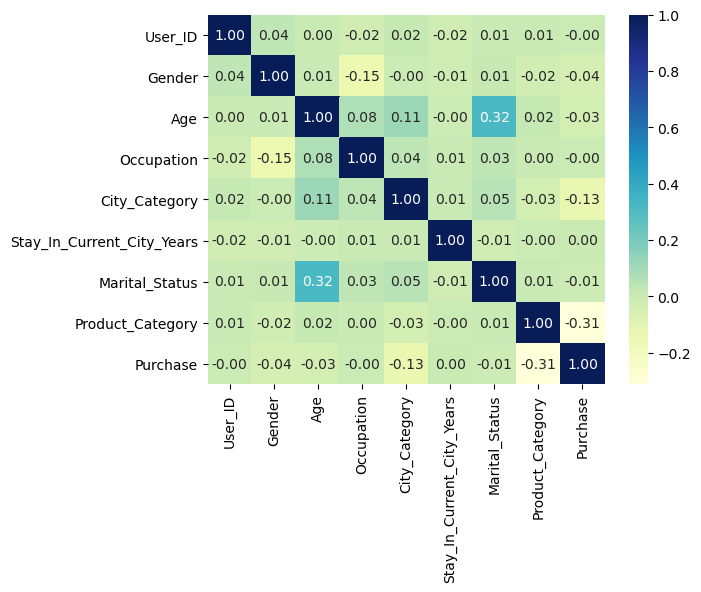

In [25]:
sns.heatmap(dfcopy.corr(),cmap="YlGnBu",annot=True,fmt="0.2f")
plt.show()

# 2. Missing Values and outlier detection

In [34]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### There is 0 missing values across the dataFrame

## Outlier Detection

In [36]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [99]:
groupedDf=df.groupby(["User_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status"])["Purchase"].sum().reset_index()

In [100]:
groupedDf

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4+,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001
...,...,...,...,...,...,...,...,...
5886,1006036,F,26-35,15,B,4+,1,4116058
5887,1006037,F,46-50,1,C,4+,0,1119538
5888,1006038,F,55+,1,C,2,0,90034
5889,1006039,F,46-50,0,B,4+,1,590319


In [49]:
#Purchase for each user
groupedDf=df.groupby(["User_ID"])["Purchase"].sum().reset_index()

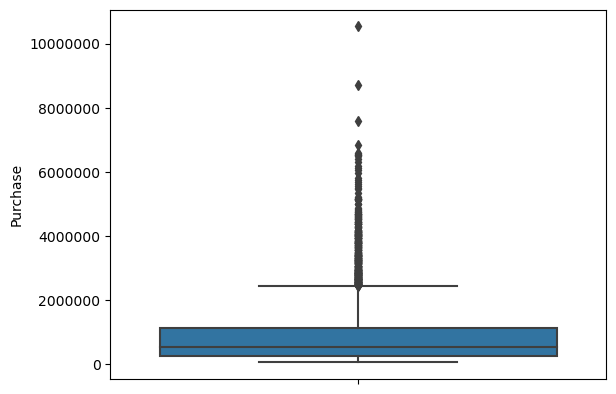

In [15]:
sns.boxplot(y=groupedDf["Purchase"],data=groupedDf)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [13]:
Q1=np.percentile(groupedDf["Purchase"],25)
Q3=np.percentile(groupedDf["Purchase"],75)

In [9]:
groupedDf["Purchase"].mean()

865016.5917501273

In [10]:
groupedDf["Purchase"].median()

521213.0

In [19]:
Q3+(1.5*(Q3-Q1))

2441606.75

In [22]:
highPurchaseCust=groupedDf[groupedDf["Purchase"]>=Q3+1.5*(Q3-Q1)]

In [19]:
temp=df[df["User_ID"].isin(groupedDf[groupedDf["Purchase"]>=Q3+1.5*(Q3-Q1)]["User_ID"])]

### most famous product category amoungst men

In [36]:
men=df[df["Gender"]=="M"]
women=df[df["Gender"]=="F"]

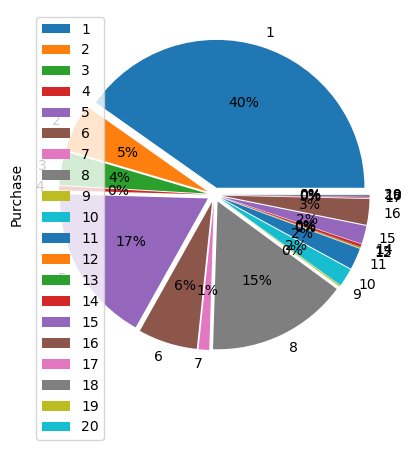

In [34]:
explode = (0.05,)*men["Product_Category"].nunique()
men.groupby(["Product_Category"]).aggregate({"Purchase":"sum"}).plot(kind='pie',explode=explode, y='Purchase',autopct='%1.0f%%')
plt.show()

### Most famour product category amoungst female

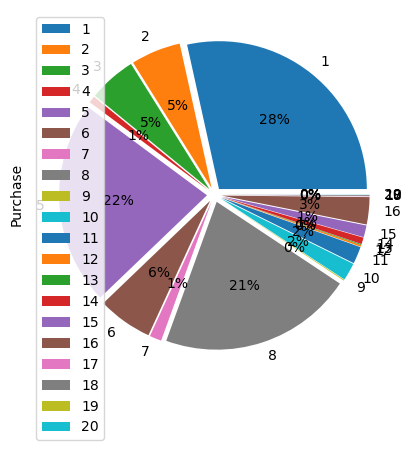

In [37]:
explode = (0.05,)*women["Product_Category"].nunique()
women.groupby(["Product_Category"]).aggregate({"Purchase":"sum"}).plot(kind='pie',explode=explode, y='Purchase',autopct='%1.0f%%')
plt.show()

### most popular category for high priority customers

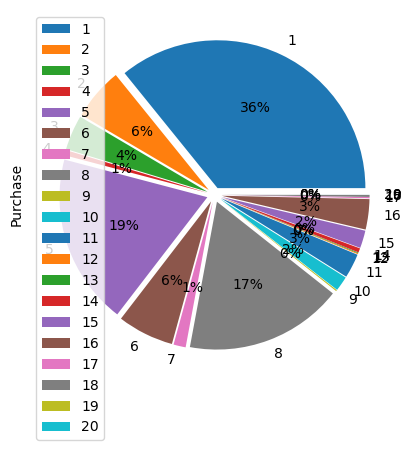

In [20]:
explode = (0.05,)*temp["Product_Category"].nunique()
temp.groupby(["Product_Category"]).aggregate({"Purchase":"sum"}).plot(kind='pie',explode=explode, y='Purchase',autopct='%1.0f%%')
plt.show()

In [23]:
explode = (0.05,)*temp["Product_ID"].nunique()
temp.groupby(["Product_ID"]).aggregate({"Purchase":"sum"}).head(2)

,Purchase
Product_ID,
P00000142,2196316
P00000242,1138845


## high purhase customers

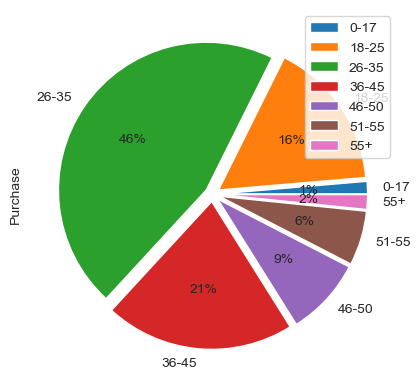

In [28]:
explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05)
highPurchaseCust.groupby(["Age"]).aggregate({"Purchase":"sum"}).plot(kind='pie',explode=explode, y='Purchase',autopct='%1.0f%%')
plt.show()

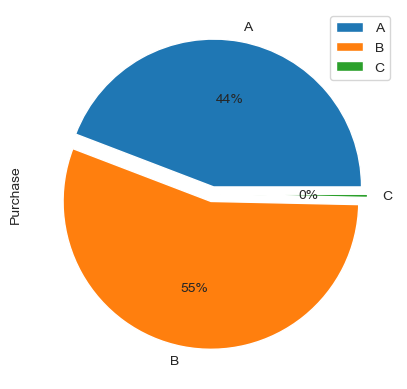

In [33]:
explode = (0.05,)*highPurchaseCust["City_Category"].nunique()
highPurchaseCust.groupby(["City_Category"]).aggregate({"Purchase":"sum"}).plot(kind='pie',explode=explode, y='Purchase',autopct='%1.0f%%')
plt.show()

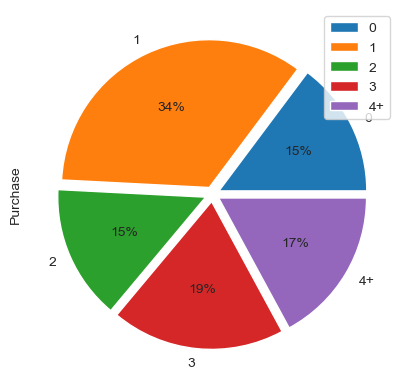

In [34]:
explode = (0.05,)*highPurchaseCust["Stay_In_Current_City_Years"].nunique()
highPurchaseCust.groupby(["Stay_In_Current_City_Years"]).aggregate({"Purchase":"sum"}).plot(kind='pie',explode=explode, y='Purchase',autopct='%1.0f%%')
plt.show()

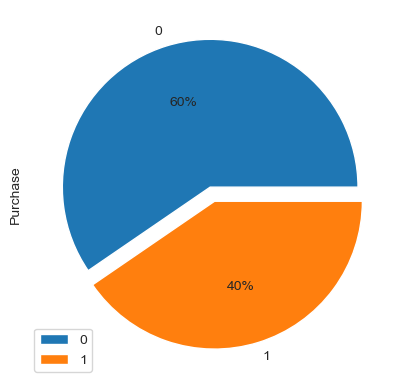

In [35]:
explode = (0.05,)*highPurchaseCust["Marital_Status"].nunique()
highPurchaseCust.groupby(["Marital_Status"]).aggregate({"Purchase":"sum"}).plot(kind='pie',explode=explode, y='Purchase',autopct='%1.0f%%')
plt.show()

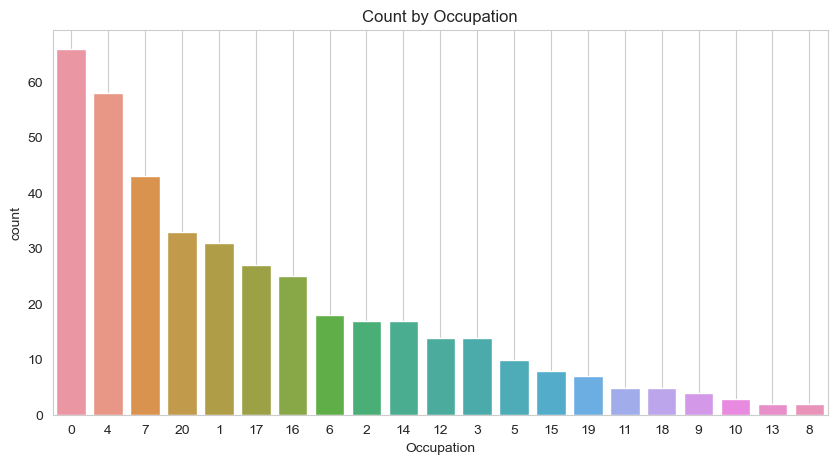

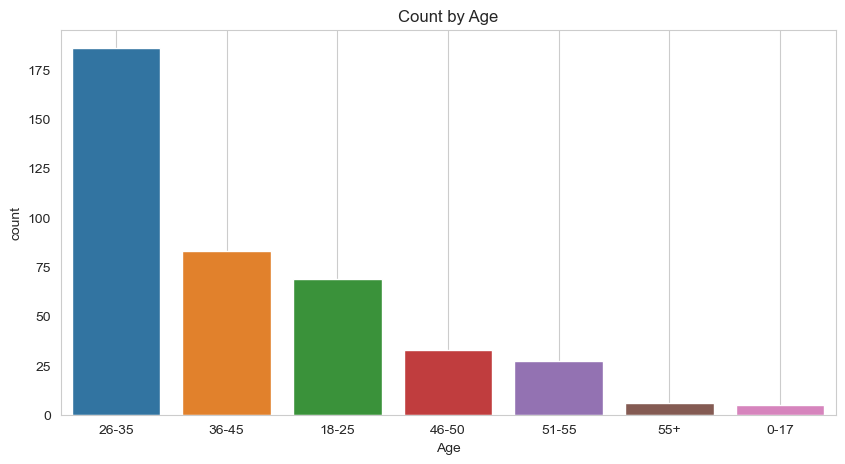

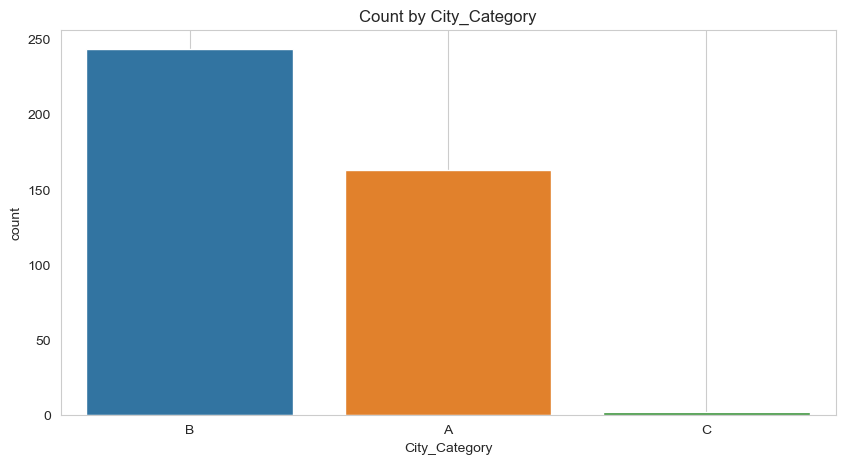

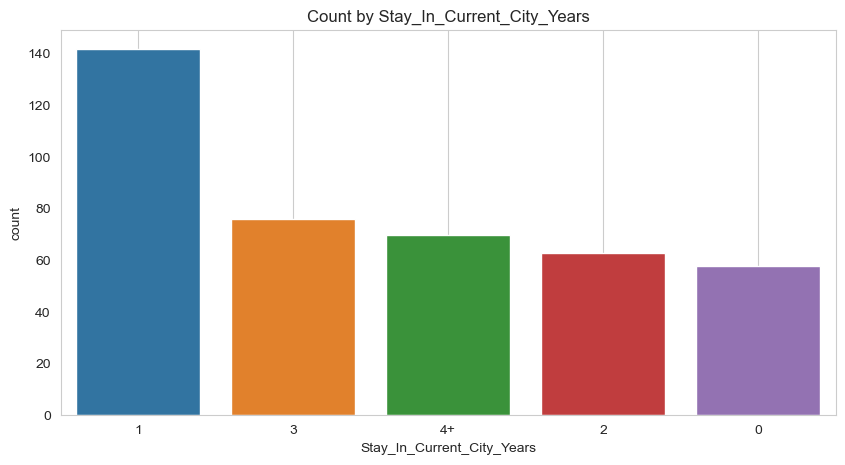

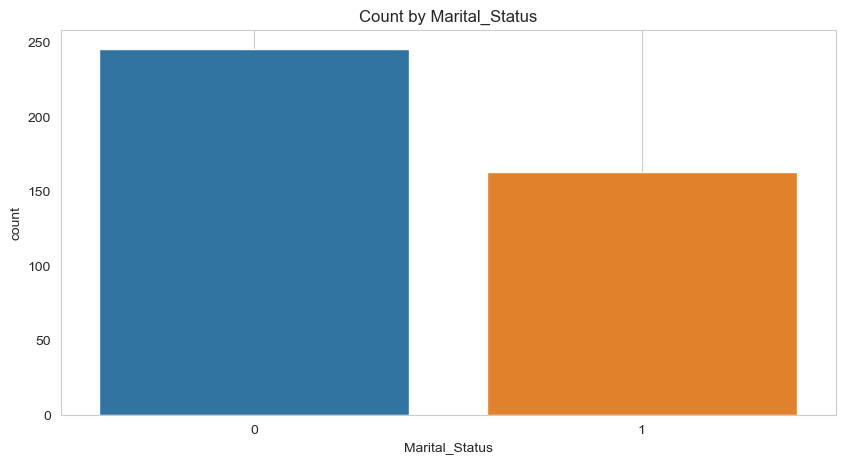

In [21]:
for i in ["Occupation","Age","City_Category","Stay_In_Current_City_Years","Marital_Status"]:
    getcountplot(groupedDf[groupedDf["Purchase"]>=Q3+1.5*(Q3-Q1)],i)

In [20]:
groupedDf[groupedDf["Purchase"]>=Q3+1.5*(Q3-Q1)]

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
45,1000048,M,26-35,4,B,3,1,2788504
50,1000053,M,26-35,0,B,1,0,4270371
55,1000058,M,26-35,2,B,3,0,2896836
59,1000062,F,36-45,3,A,1,0,2513618
113,1000117,M,26-35,17,A,2,1,2742646
...,...,...,...,...,...,...,...,...
5804,1005954,M,46-50,11,A,2,1,4551927
5814,1005964,M,18-25,5,B,1,0,3117743
5846,1005996,F,26-35,0,B,1,1,3021711
5866,1006016,M,46-50,1,B,1,1,3770970


### users with purchase more than 2441606.75 can be considered as outliers

In [105]:
groupedDf[groupedDf["Purchase"]>=Q3+1.5*(Q3-Q1)].sort_values(by=["Purchase"],ascending=False).head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
4166,1004277,M,36-45,16,A,0,0,10536909
1634,1001680,M,26-35,20,A,3,1,8699596
2831,1002909,M,26-35,7,A,1,0,7577756
1885,1001941,M,36-45,17,A,1,0,6817493
416,1000424,M,26-35,17,A,3,0,6573609


### There are 409 users like that but user id 1004277 had the highest purchase amount of 10536909

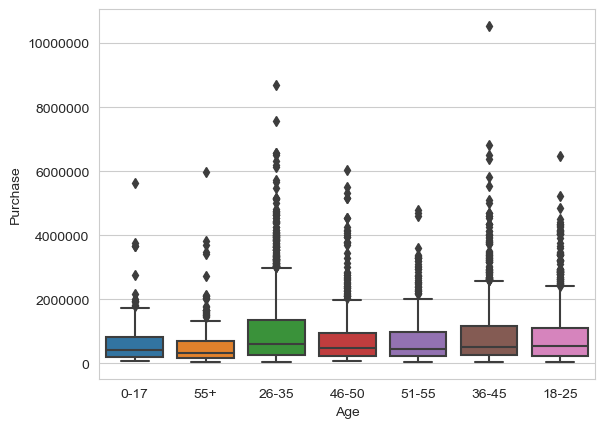

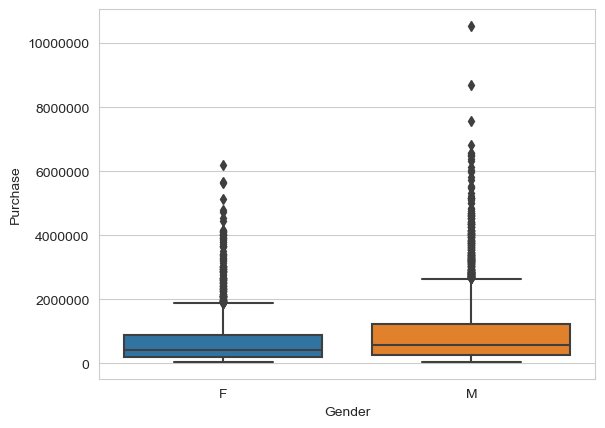

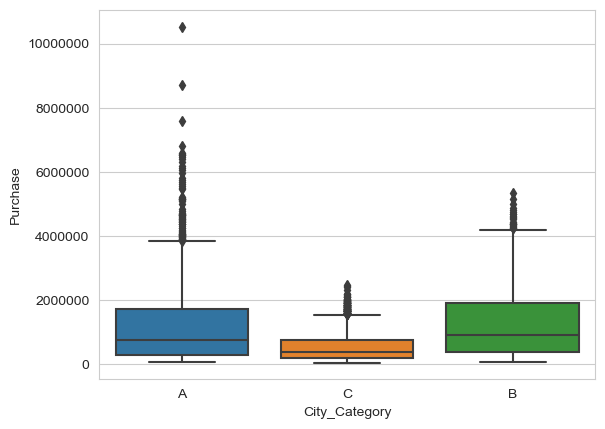

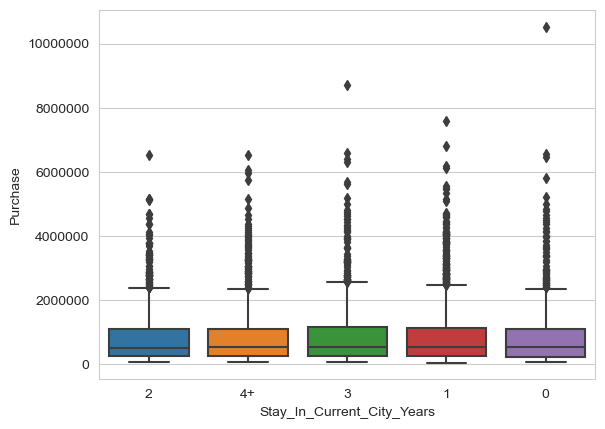

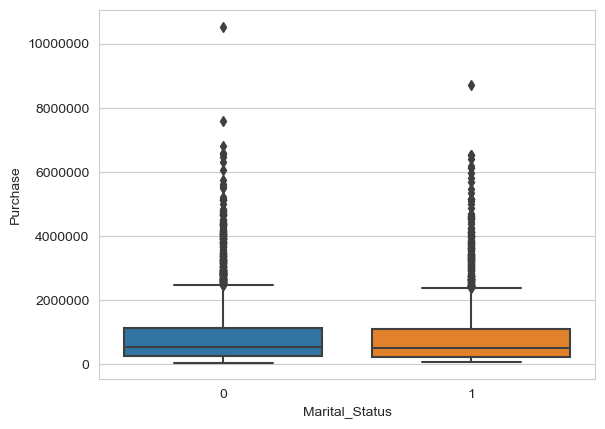

In [16]:
for i in ["Age","Gender","City_Category","Stay_In_Current_City_Years","Marital_Status"]:
    sns.set_style("whitegrid")
    sns.boxplot(x=groupedDf[i],y=groupedDf["Purchase"])
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

#### There outliers are spread across all the columns , Doesn't seems like for a particular category it is high

## If we consider them as outlier how it can be removed? by clipping

In [107]:
dfOutlierRem=groupedDf.copy()

In [110]:
dfOutlierRem["Purchase"]=np.clip(dfOutlierRem["Purchase"],np.percentile(dfOutlierRem["Purchase"],5),np.percentile(dfOutlierRem["Purchase"],95))

# 3. Business Insights based on Non- Graphical and Visual Analysis



### Comments on the range of attributes

	1. There are total 5891 user_id present in dataset in which 414259 rows are for male and 135809 are for female.
	2. There are total 4225 unique Male and 1666 unique female in dataset.
	3. There are 3631 unique Product_ID
	4. Age Column has values from 0 to 55+ divided into 7 bins.
	5. Occupation column has 21 unique values.
	6. City category has 3 unique values (A,B,C).
	7. Stay_In_Current_City_Years has 5 unique values (0,1,2,3,4)
	8. Marital_Status has two unique values (0,1)
	9. Product_Category has 20 unique values.
	10. Purchase is continuos variable.

###    Comments on the distribution of the variables and relationship between them

	1.  Basic stats for Purchase column:
	
		count    5.891000e+03
		mean     8.650166e+05
		std      9.436445e+05
		min      4.668100e+04
		25%      2.376780e+05
		50%      5.212130e+05
		75%      1.119250e+06
		max      1.053691e+07 
	2. Data has 550068 rows and  10 columns
    3. The mean of Purchase is around 521213.0 but the median is 865016.5917501273 which shows that data had some high purchase value thats why mean shifter towrds right.
    4. There is no duplicates in dataset.
    5. There is no null values in dataset.

### Comments for each univariate and bivariate plot
	

	1. The Hist plot tells that slightly more than 5000 is the count of shopping under 2000000
	2. 7000 is the count for occupation category 4 (which is max) category 8 has the least count.
	3. slightly more than 3000 users belong to City_category C.
	4. 2000+ users have been living in their current city for more than 1 year
	5. count of unmarried user is more than that of the married.
	6. Majority of the users are from age group 26-35

# 4.1 Are women spending more money per transaction than men? Why or Why not? 

In [112]:
groupedDf.groupby(["Gender"])["Purchase"].mean().reset_index()

,Gender,Purchase
0,F,712024.394958
1,M,925344.402367


### ON an Average Men are spending more as comapred to Women

# 4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers 
# 4.3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

# Considering given dataset is the population

# we have taken the sample size of 10% of the population

In [118]:
def calculateCI(sampleMean):
    for i in [0.70,0.90,0.95,0.99]:
        print("for {}% confidence Interval :".format(i),np.percentile(sampleMean,[100*(1-i)/2,100*(1-(1-i)/2)]))

def CLT(dfCLT):
    
    sampleSize=int(dfCLT.shape[0]*0.10)
    print("sample Size:",sampleSize)
    sample=np.random.choice(dfCLT["Purchase"],size=sampleSize)
    
    n=sampleSize
    sampleMean=[]
    for i in range(1200):
        sampleMean.append(np.random.choice(sample,size=n).mean())
    sns.histplot(sampleMean)
    plt.show()
    
    print("Population mean  for Purchase:",dfCLT["Purchase"].mean())
    print("Population stdDev for Purchase:",dfCLT["Purchase"].std())
    
    print("population size:",dfCLT.shape[0])
    print("sample mean:",np.mean(sampleMean))
    print("standard Error:",dfCLT["Purchase"].std()/np.sqrt(sampleSize))
    
    calculateCI(sampleMean)
    
    return sampleMean

sample Size: 589


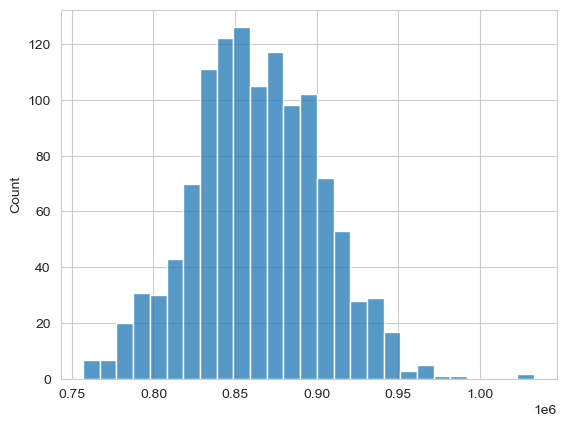

Population mean  for Purchase: 865016.5917501273
Population stdDev for Purchase: 943644.5396828403
population size: 5891
sample mean: 863781.3009776457
standard Error: 38882.195882702516
for 0.7% confidence Interval : [824889.62368421 903980.49219015]
for 0.9% confidence Interval : [796654.12877759 928993.96129032]
for 0.95% confidence Interval : [786018.70339559 939845.2852292 ]
for 0.99% confidence Interval : [765755.90756367 964640.00046689]


In [119]:
sampleMean = CLT(groupedDf)

## For Male

In [120]:
maleDf=groupedDf[groupedDf["Gender"]=="M"]

sample Size: 422


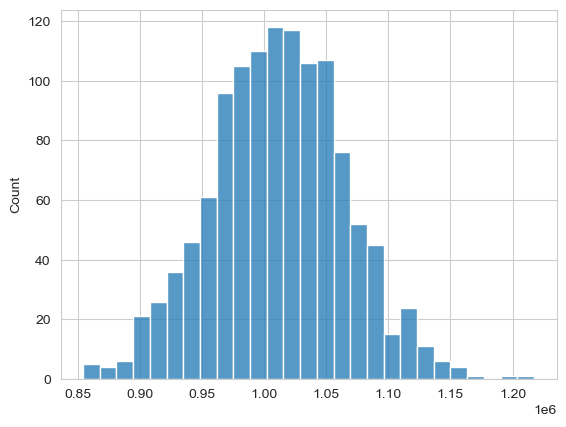

Population mean  for Purchase: 925344.4023668639
Population stdDev for Purchase: 985830.100795388
population size: 4225
sample mean: 1011171.5636236176
standard Error: 47989.45845033084
for 0.7% confidence Interval : [ 955524.13518957 1065294.10805687]
for 0.9% confidence Interval : [ 921110.30959716 1098157.92819905]
for 0.95% confidence Interval : [ 904400.59454976 1117048.27150474]
for 0.99% confidence Interval : [ 872522.5236019 1150293.3853436]


In [121]:
sampleMean = CLT(maleDf)

## For Female

In [122]:
femaleDf=groupedDf[groupedDf["Gender"]=="F"]

sample Size: 166


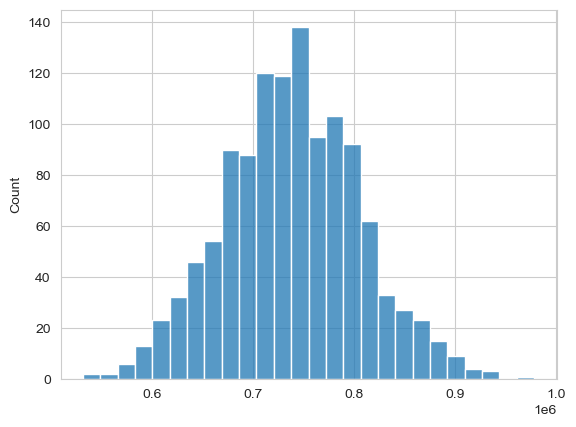

Population mean  for Purchase: 712024.3949579832
Population stdDev for Purchase: 807370.7261464577
population size: 1666
sample mean: 738533.1591164658
standard Error: 62664.12135384768
for 0.7% confidence Interval : [669779.84879518 805625.96596386]
for 0.9% confidence Interval : [627624.9376506  854864.10481928]
for 0.95% confidence Interval : [607705.3748494  875972.50165663]
for 0.99% confidence Interval : [571060.34945783 911194.50653614]


In [123]:
sampleMean = CLT(femaleDf)

with 90 % confidence interval we can say that the male spend between [ 921110.30959716 1098157.92819905] and female spends between [607705.3748494  875972.50165663]

             Male                                                                             female

        for 0.7% CI:[ 955524.13518957 1065294.10805687]                     for 0.7% CI : [669779.84879518 805625.96596386]
        for 0.9% CI : [ 921110.30959716 1098157.92819905]                 for 0.7% CI: [627624.9376506  854864.10481928]         
        for 0.95% CI : [ 904400.59454976 1117048.27150474]              for 0.9% CI: [607705.3748494  875972.50165663]
        for 0.99% CI : [ 872522.5236019 1150293.3853436]                for 0.99% CI: [571060.34945783 911194.50653614]


## THERE seems to be no overlap between male and female Confidence Interval except for 99% where range for male CI is [ 872522.5236019 1150293.3853436] while for female it is [571060.34945783 911194.50653614]

## The Above result is considering the dataset that we had as the population, now if we consider the dataset as sample(CI for 100m customer)

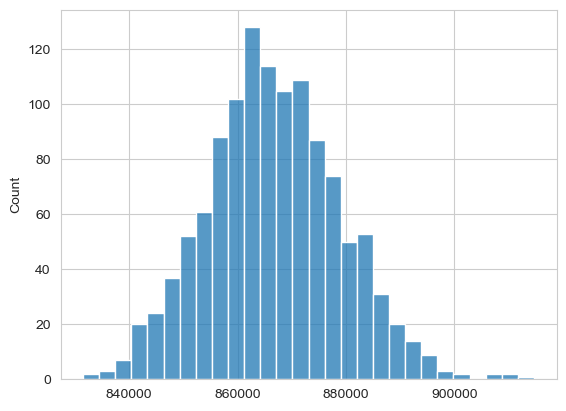

sample mean: 866685.7379443219
for 0.7% confidence Interval : [853976.01591411 879604.16124597]
for 0.9% confidence Interval : [847202.84064675 886779.72143948]
for 0.95% confidence Interval : [843174.7728569  891087.24774656]
for 0.99% confidence Interval : [837890.49332796 900805.886633  ]


In [149]:
sample=np.random.choice(groupedDf["Purchase"],size=groupedDf.shape[0])
sampleMean=[]
for i in range(1200):
    sampleMean.append(np.random.choice(sample,size=groupedDf.shape[0]).mean())
sns.histplot(sampleMean)
plt.show()

print("sample mean:",np.mean(sampleMean))
calculateCI(sampleMean)

## for Male

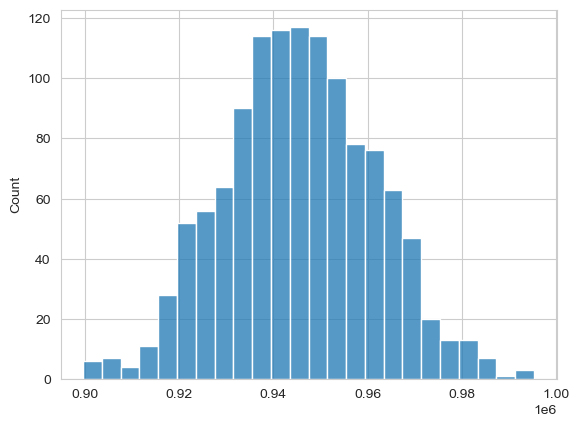

sample mean: 945509.1456895462
for 0.7% confidence Interval : [928492.10500592 962498.13771598]
for 0.9% confidence Interval : [919859.34901775 970976.5284497 ]
for 0.95% confidence Interval : [915861.0402071  977665.89613018]
for 0.99% confidence Interval : [904282.17343787 985827.67348047]


In [150]:
sample=np.random.choice(groupedDf[groupedDf["Gender"]=="M"]["Purchase"],size=groupedDf[groupedDf["Gender"]=="M"].shape[0])
sampleMean=[]
for i in range(1200):
    sampleMean.append(np.random.choice(sample,size=groupedDf[groupedDf["Gender"]=="M"].shape[0]).mean())
sns.histplot(sampleMean)
plt.show()

print("sample mean:",np.mean(sampleMean))
calculateCI(sampleMean)

## for Female

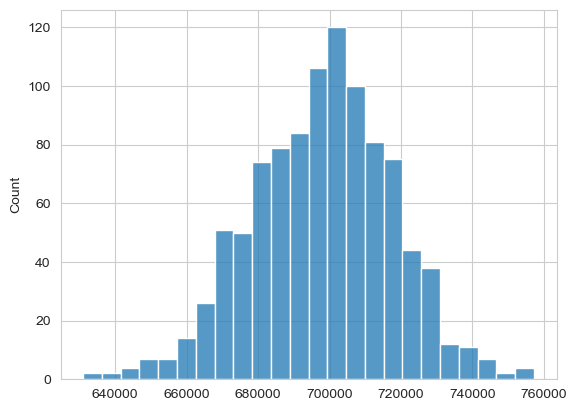

sample mean: 697965.6364189676
for 0.7% confidence Interval : [677111.12593037 718176.60258103]
for 0.9% confidence Interval : [666247.65162065 728068.27286915]
for 0.95% confidence Interval : [658201.42840636 735036.5962485 ]
for 0.99% confidence Interval : [644541.61721188 749929.61184874]


In [152]:
sample=np.random.choice(groupedDf[groupedDf["Gender"]=="F"]["Purchase"],size=groupedDf[groupedDf["Gender"]=="F"].shape[0])
sampleMean=[]
for i in range(1000):
    sampleMean.append(np.random.choice(sample,size=groupedDf[groupedDf["Gender"]=="F"]["Purchase"].shape[0]).mean())
sns.histplot(sampleMean)
plt.show()

print("sample mean:",np.mean(sampleMean))
calculateCI(sampleMean)

# 4.4  Results when the same activity is performed for Married vs Unmarried

In [153]:
married = groupedDf[groupedDf["Marital_Status"]==1]
unmarried = groupedDf[groupedDf["Marital_Status"]==0]

sample Size: 247


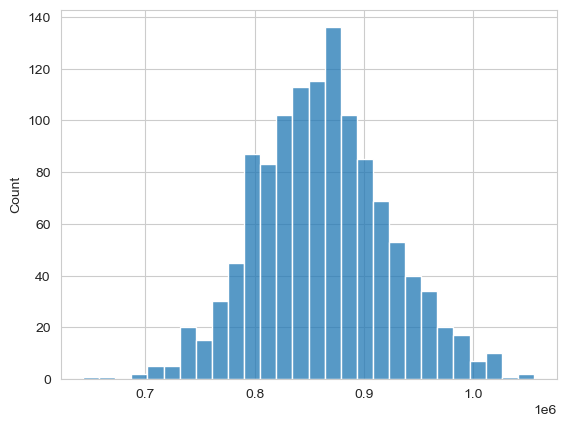

Population mean  for Purchase: 843526.7966855295
Population stdDev for Purchase: 935352.1158252308
population size: 2474
sample mean: 861779.6159446695
standard Error: 59515.02993167492
for 0.7% confidence Interval : [800723.77611336 923488.82388664]
for 0.9% confidence Interval : [769155.30202429 964558.0888664 ]
for 0.95% confidence Interval : [744386.22722672 988301.31680162]
for 0.99% confidence Interval : [ 711588.49753036 1021360.44712551]


In [155]:
sampleMean = CLT(married)

sample Size: 341


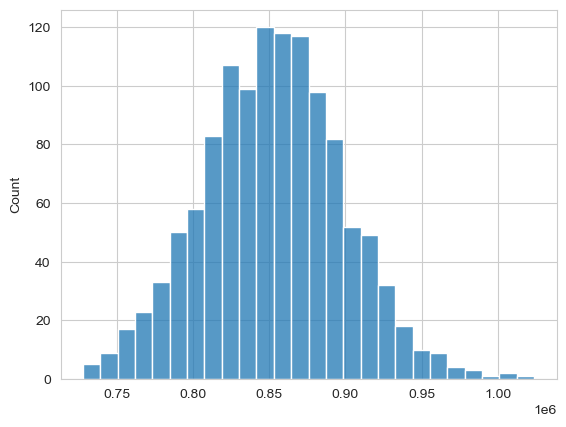

Population mean  for Purchase: 880575.7819724905
Population stdDev for Purchase: 949436.249555238
population size: 3417
sample mean: 852584.9881280548
standard Error: 51414.855503828076
for 0.7% confidence Interval : [805746.70102639 898673.84208211]
for 0.9% confidence Interval : [775813.72844575 929721.50894428]
for 0.95% confidence Interval : [761383.60813783 943977.73497067]
for 0.99% confidence Interval : [743537.22382698 978590.92675953]


In [156]:
sampleMean = CLT(unmarried)

## considering the data as Sample

## married

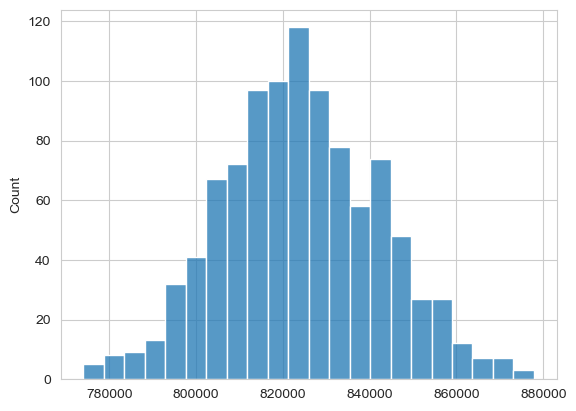

sample mean: 824128.318137025
for 0.7% confidence Interval : [805326.81224737 843403.06552142]
for 0.9% confidence Interval : [795640.66505659 854760.9386823 ]
for 0.95% confidence Interval : [789250.77686944 860208.59284559]
for 0.99% confidence Interval : [778948.17849434 871051.22117219]


In [157]:
sample=np.random.choice(groupedDf[groupedDf["Marital_Status"]==1]["Purchase"],size=groupedDf[groupedDf["Marital_Status"]==1].shape[0])
sampleMean=[]
for i in range(1000):
    sampleMean.append(np.random.choice(sample,size=groupedDf[groupedDf["Marital_Status"]==1].shape[0]).mean())
sns.histplot(sampleMean)
plt.show()

print("sample mean:",np.mean(sampleMean))
calculateCI(sampleMean)

## unmarried

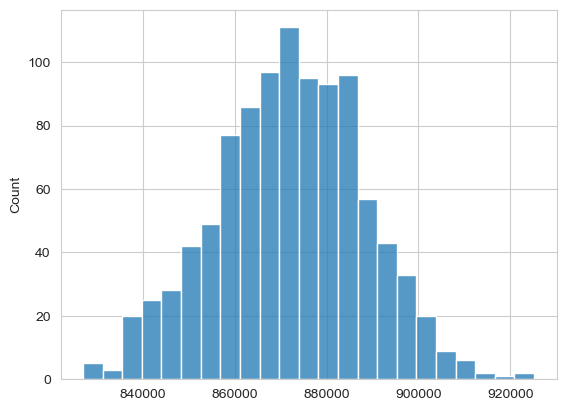

sample mean: 871955.0021916886
for 0.7% confidence Interval : [855032.50279485 888249.9873866 ]
for 0.9% confidence Interval : [843879.98328944 897664.3492391 ]
for 0.95% confidence Interval : [839482.84804653 902523.42722417]
for 0.99% confidence Interval : [833285.92452736 911293.10934884]


In [158]:
sample=np.random.choice(groupedDf[groupedDf["Marital_Status"]==0]["Purchase"],size=groupedDf[groupedDf["Marital_Status"]==0].shape[0])
sampleMean=[]
for i in range(1000):
    sampleMean.append(np.random.choice(sample,size=groupedDf[groupedDf["Marital_Status"]==0].shape[0]).mean())
sns.histplot(sampleMean)
plt.show()

print("sample mean:",np.mean(sampleMean))
calculateCI(sampleMean)

# 4.5 Results when the same activity is performed for Age

## considering the dataset as population

Age: 0-17
sample Size: 21


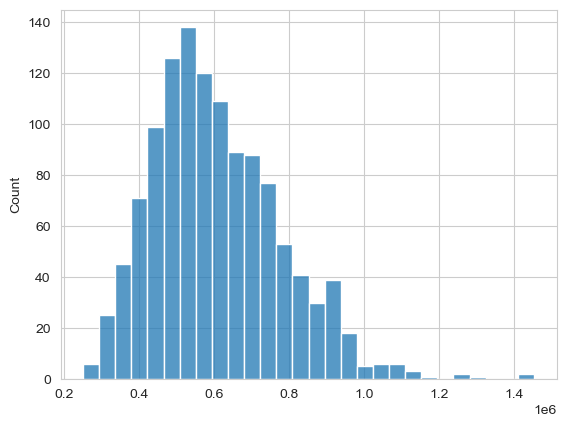

Population mean  for Purchase: 618867.8119266055
Population stdDev for Purchase: 687056.5978868342
population size: 218
sample mean: 608261.5553571429
standard Error: 149928.04126358355
for 0.7% confidence Interval : [435156.88571429 783468.43333333]
for 0.9% confidence Interval : [368084.1        912825.50952381]
for 0.95% confidence Interval : [336114.075      968374.67023809]
for 0.99% confidence Interval : [ 298106.05261905 1139167.23619047]
Age: 55+
sample Size: 37


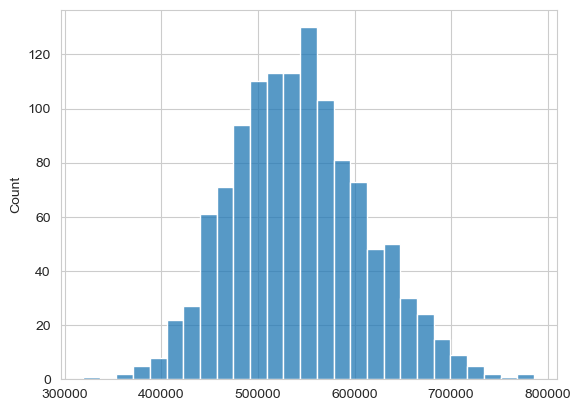

Population mean  for Purchase: 539697.2446236559
Population stdDev for Purchase: 617478.8747609294
population size: 372
sample mean: 542117.7684234234
standard Error: 101512.90169314833
for 0.7% confidence Interval : [471122.39459459 613506.62432432]
for 0.9% confidence Interval : [437602.45135135 662459.00540541]
for 0.95% confidence Interval : [416866.50472973 686865.06689189]
for 0.99% confidence Interval : [387286.51297297 721055.70324324]
Age: 26-35
sample Size: 205


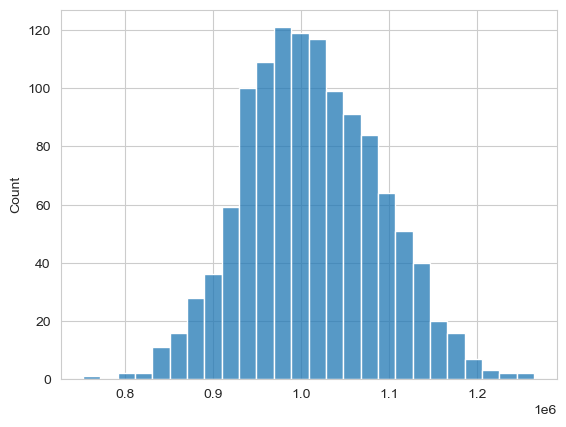

Population mean  for Purchase: 989659.3170969313
Population stdDev for Purchase: 1031610.1238008776
population size: 2053
sample mean: 1011776.2014552846
standard Error: 72050.77638851381
for 0.7% confidence Interval : [ 934844.89341463 1095629.60195122]
for 0.9% confidence Interval : [ 891300.60414634 1141309.12365854]
for 0.95% confidence Interval : [ 869222.94512195 1166343.40621951]
for 0.99% confidence Interval : [ 834300.86780488 1206882.353     ]
Age: 46-50
sample Size: 53


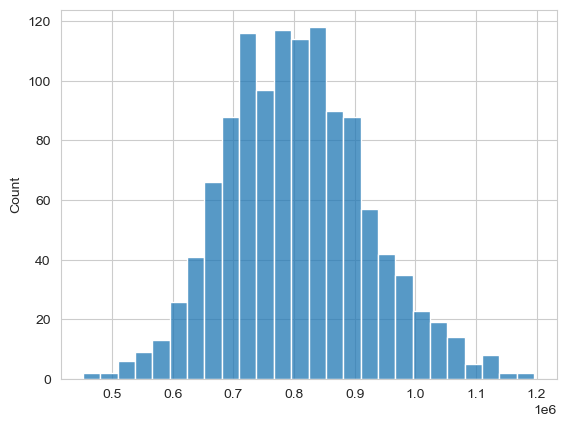

Population mean  for Purchase: 792548.7815442561
Population stdDev for Purchase: 929298.8774144999
population size: 531
sample mean: 803947.3209433963
standard Error: 127649.01787853934
for 0.7% confidence Interval : [686483.46132075 921692.50660377]
for 0.9% confidence Interval : [ 627005.97264151 1004745.72358491]
for 0.95% confidence Interval : [ 593967.64764151 1054599.61792453]
for 0.99% confidence Interval : [ 519725.29179245 1137090.14971698]
Age: 51-55
sample Size: 48


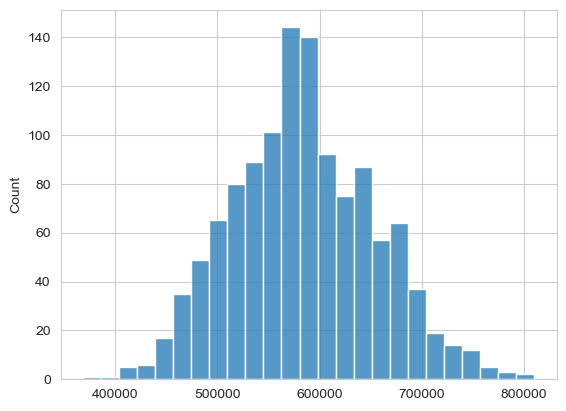

Population mean  for Purchase: 763200.9230769231
Population stdDev for Purchase: 792322.243484427
population size: 481
sample mean: 584527.7833506945
standard Error: 114361.86514016554
for 0.7% confidence Interval : [510142.48229167 659664.22604167]
for 0.9% confidence Interval : [472748.56666667 701977.03645833]
for 0.95% confidence Interval : [457323.72083333 727763.50625   ]
for 0.99% confidence Interval : [413205.67572917 763856.31520833]
Age: 36-45
sample Size: 116


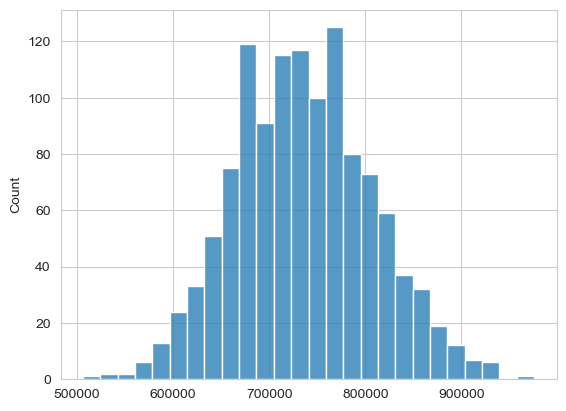

Population mean  for Purchase: 879665.7103684661
Population stdDev for Purchase: 981580.3877317647
population size: 1167
sample mean: 735557.3676867816
standard Error: 91137.45102390587
for 0.7% confidence Interval : [662791.82025862 808240.07112069]
for 0.9% confidence Interval : [624054.91422414 856454.12543103]
for 0.95% confidence Interval : [600705.49762931 882847.66939655]
for 0.99% confidence Interval : [563522.09090517 922952.96206897]
Age: 18-25
sample Size: 106


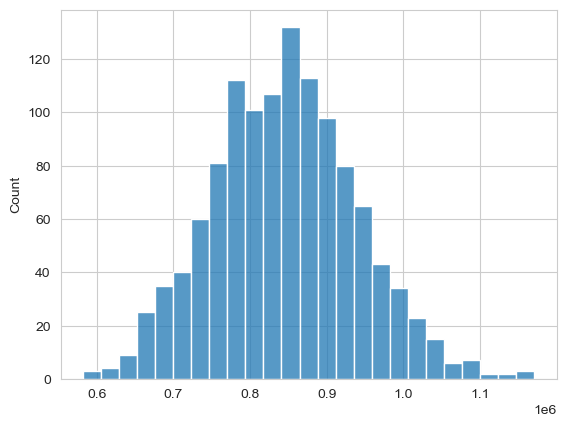

Population mean  for Purchase: 854863.119738073
Population stdDev for Purchase: 887957.2520758108
population size: 1069
sample mean: 845130.3997484277
standard Error: 86246.03253188405
for 0.7% confidence Interval : [747657.39245283 941780.83207547]
for 0.9% confidence Interval : [ 694216.88679245 1003574.10141509]
for 0.95% confidence Interval : [ 665975.37429245 1036095.03349057]
for 0.99% confidence Interval : [ 625744.83136792 1109179.25542453]


In [160]:
for i in groupedDf["Age"].unique():
    print("Age:",i)
    sampleMean = CLT(groupedDf[groupedDf["Age"]==i])
    print("==================================================")

## considering the data as sample

## Estimation population mean

Age: 0-17


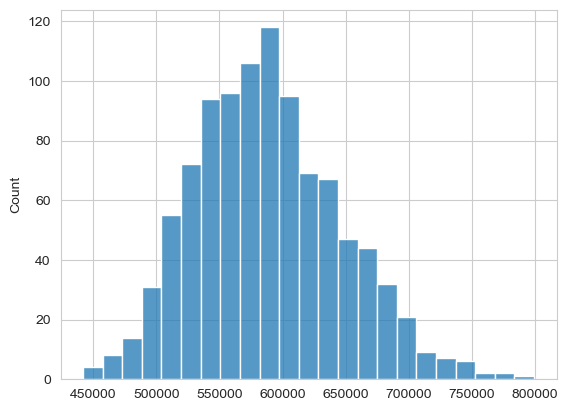

sample mean: 588179.7501238532
for 0.7% confidence Interval : [529563.04724771 650892.84105505]
for 0.9% confidence Interval : [501486.53050459 687952.10022936]
for 0.95% confidence Interval : [488444.49529817 706878.99002294]
for 0.99% confidence Interval : [460412.15807339 749323.98669725]
Age: 55+


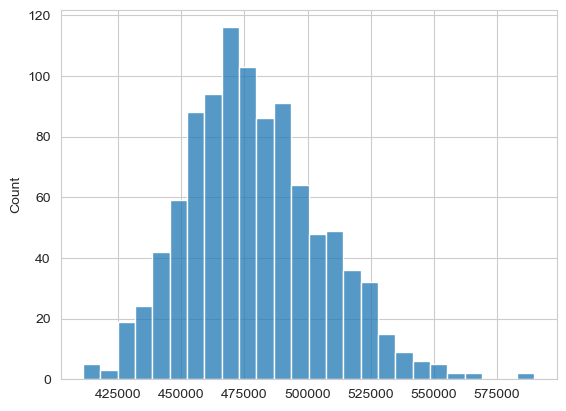

sample mean: 478919.8350967742
for 0.7% confidence Interval : [452334.64704301 508201.11787634]
for 0.9% confidence Interval : [437977.83991935 524702.41169355]
for 0.95% confidence Interval : [431365.74133065 535018.86061828]
for 0.99% confidence Interval : [421054.60525538 557087.14696237]
Age: 26-35


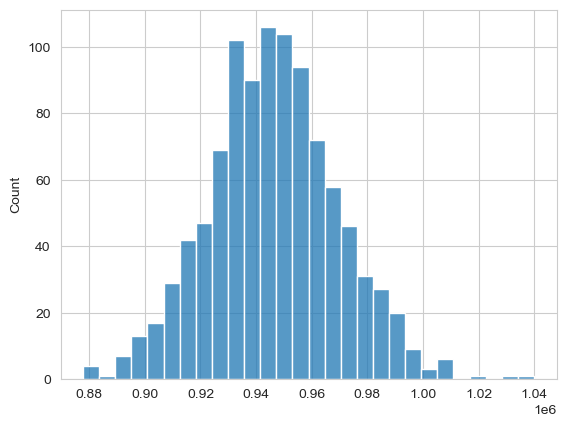

sample mean: 946072.2770248418
for 0.7% confidence Interval : [922320.78767657 969474.9942036 ]
for 0.9% confidence Interval : [908742.62342913 985130.09732099]
for 0.95% confidence Interval : [901179.10806137 992539.8616415 ]
for 0.99% confidence Interval : [ 890488.73798587 1007504.88439844]
Age: 46-50


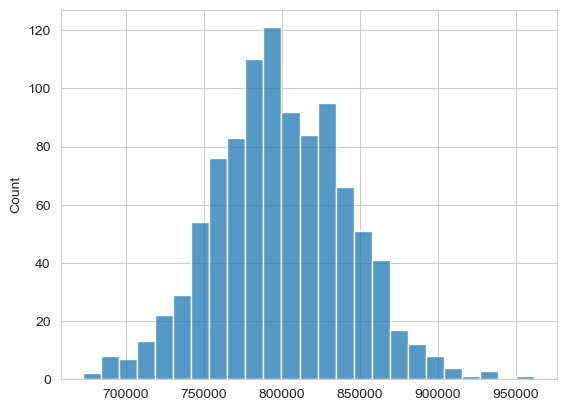

sample mean: 799268.6642259887
for 0.7% confidence Interval : [756081.6106403  843795.66760829]
for 0.9% confidence Interval : [728930.46892655 867449.59661017]
for 0.95% confidence Interval : [716418.33046139 884374.07683616]
for 0.99% confidence Interval : [688965.20194915 914087.04855932]
Age: 51-55


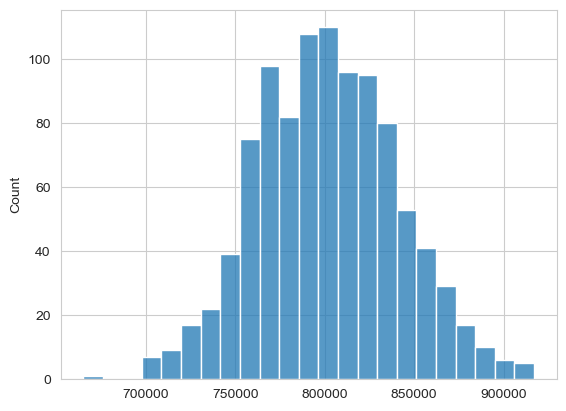

sample mean: 801402.3926174636
for 0.7% confidence Interval : [760863.60841996 842618.32806653]
for 0.9% confidence Interval : [738684.03679834 868084.53711019]
for 0.95% confidence Interval : [727835.46683992 881537.74085239]
for 0.99% confidence Interval : [705510.47441788 905145.43231809]
Age: 36-45


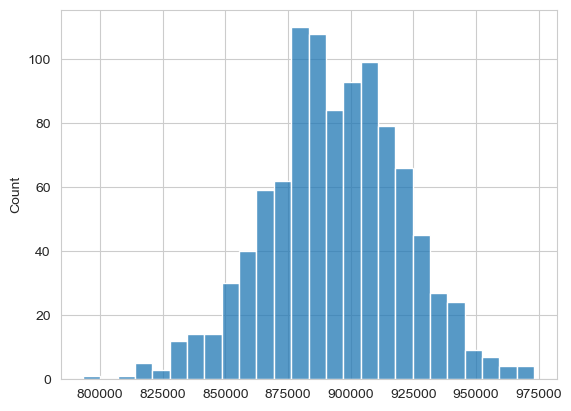

sample mean: 893535.8703007712
for 0.7% confidence Interval : [866389.5356898  920875.83976007]
for 0.9% confidence Interval : [848697.19515853 937472.9045844 ]
for 0.95% confidence Interval : [837628.02236504 945122.3332048 ]
for 0.99% confidence Interval : [819999.34670094 961898.7941988 ]
Age: 18-25


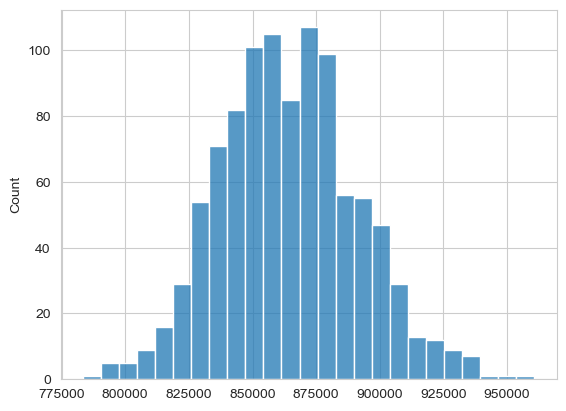

sample mean: 864247.4977595885
for 0.7% confidence Interval : [836211.81328344 893066.67207671]
for 0.9% confidence Interval : [822855.18367633 909665.6494855 ]
for 0.95% confidence Interval : [815669.23914874 921554.28961646]
for 0.99% confidence Interval : [797232.00074369 936331.43951824]


In [169]:
for age in groupedDf["Age"].unique():
    print("Age:",age)
    sample=np.random.choice(groupedDf[groupedDf["Age"]==age]["Purchase"],size=groupedDf[groupedDf["Age"]==age].shape[0])
    sampleMean=[]
    for i in range(1000):
        sampleMean.append(np.random.choice(sample,size=groupedDf[groupedDf["Age"]==age].shape[0]).mean())
    sns.histplot(sampleMean)
    plt.show()

    print("sample mean:",np.mean(sampleMean))
    calculateCI(sampleMean)
    print("==================================================")

# 5. Final Insights - Illustrate the insights based on exploration and CLT

    Comments on the distribution of the variables and relationship between them
    Comments for each univariate and bivariate plots
    Comments on different variables when generalizing it for Population


	The histogram plotted above for Purchase shows log Normal distribution 
	
	1. There are almost double male as compared to female in dataset. It is obvious from every plot that we see.
	2. The distribtion of male and female are similar, most of them shop under 1000000 and later on the tails gets flat with    people having purchase above 4000000.
	3. There is dense distribution till 2500000 for purchase (can be seen in stirplot).
	4. People with age group 26-35 had 	major contribution towards purchase can be seen from dist and count plot.
	5. There is high correlation of Maritial status and Age.
	6. There is high negative correlation between product category and purchase.
	7. 2441606.75 is the outlier for purchase but few peoples tends to do lot of purchases (cant be consiered as outlier).
	8. There are 409 users like that but user id 1004277 had the highest purchase amount of 10536909.
	9. This extreme case belongs to age group 36-45,male gender City category A and unmarried.
	10. 46% of the people doing purchase of 2441606.75(Q3+(1.5*(Q3-Q1))) belongs to age Group 26-35, 55% of them belongs to city_category B,60% of them are unmarried.

	ALL the granular details like sample size,population size attribute categories wise are mentioned in excel snapshot
	1. There are two cases here firstly the dataset is considered as populaton and 10% data is sampled out of it(sample data),later on this dataset is considered as 
		sample and estimated for population.
	2. The sample from the population is taken out only once the again and again sample is taken out of it to give weightage to differnt means.
	3. In all the plots it can be seen as soon we take sampling mean of sample the data shows normal distribution properties.
	4. The 90% confidence Interval of male Purchase is between 9.2L$ and 10L$ for female it is 6.2L$ and 8.5L$. which doesn't have overlap.
	5.  The 90% confidence Interval of male Purchase is between 9L$ and 11.1L$ for female it is 6L$ and 8.7L$. which doesn't have overlap.
	6. But for 99% CI we have over lap which can be seen in snapshot of excel attached.
	7. There is overlap of married vs un married customers for 70,90,95,99% confidence Interval.
	8. If we talk about age for confidence Interval of 90% customers with age 55+ and 	46-50 have no overlap.customers with age 26-35 and 	36-45 have no overlap.
		customers with age 51-55 and 18-25 have no overlap. 
    9. Here the number of iterations are taken as 1000 or 1200 , it doesn't produce the same results everytime

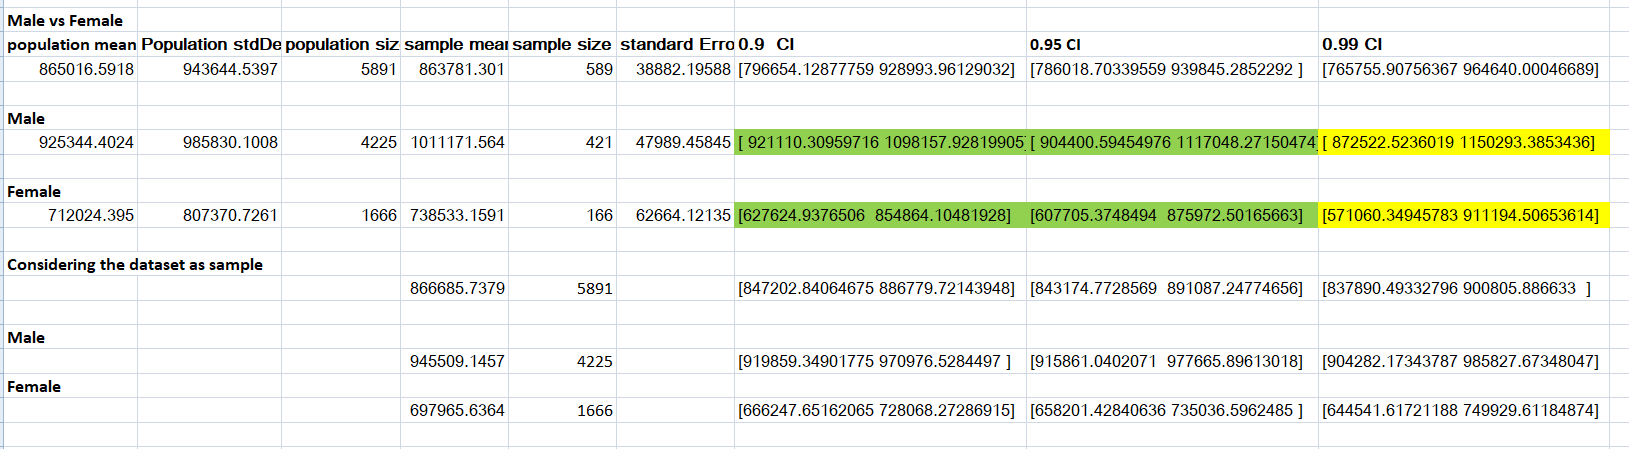

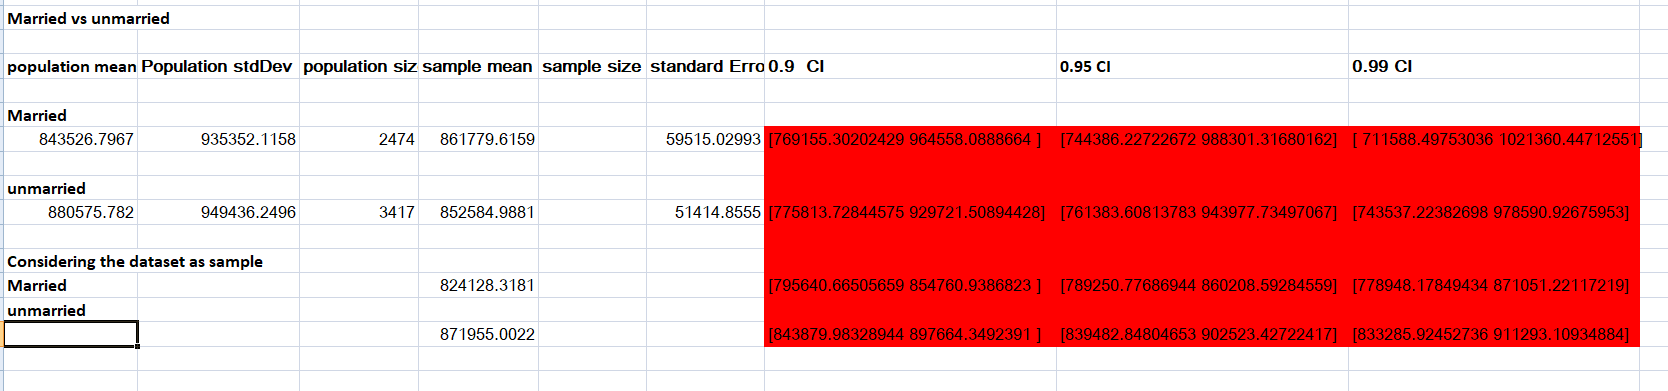

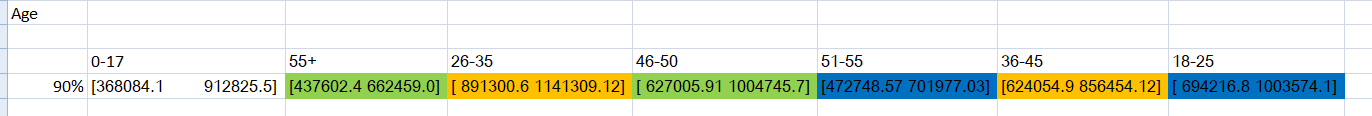

#### Estimationg the population 


	Sample mean comes out to be 866685.73.
		for 0.7% confidence Interval : [853976.01591411 879604.16124597]
		for 0.9% confidence Interval : [847202.84064675 886779.72143948]
		for 0.95% confidence Interval : [843174.7728569  891087.24774656]
		for 0.99% confidence Interval : [837890.49332796 900805.886633  ]
		
		Male:
			sample mean: 945509.1456895462
			for 0.7% confidence Interval : [928492.10500592 962498.13771598]
			for 0.9% confidence Interval : [919859.34901775 970976.5284497 ]
			for 0.95% confidence Interval : [915861.0402071  977665.89613018]
			for 0.99% confidence Interval : [904282.17343787 985827.67348047]
		Female:
			sample mean: 697965.6364189676
			for 0.7% confidence Interval : [677111.12593037 718176.60258103]
			for 0.9% confidence Interval : [666247.65162065 728068.27286915]
			for 0.95% confidence Interval : [658201.42840636 735036.5962485 ]
			for 0.99% confidence Interval : [644541.61721188 749929.61184874]
			
			
		Married:
			sample mean: 824128.318137025
			for 0.7% confidence Interval : [805326.81224737 843403.06552142]
			for 0.9% confidence Interval : [795640.66505659 854760.9386823 ]
			for 0.95% confidence Interval : [789250.77686944 860208.59284559]
			for 0.99% confidence Interval : [778948.17849434 871051.22117219]
		unmaried:
			sample mean: 871955.0021916886
			for 0.7% confidence Interval : [855032.50279485 888249.9873866 ]
			for 0.9% confidence Interval : [843879.98328944 897664.3492391 ]
			for 0.95% confidence Interval : [839482.84804653 902523.42722417]
			for 0.99% confidence Interval : [833285.92452736 911293.10934884]
			
			
		Age :0-17
			sample mean: 588179.7501238532
			for 0.7% confidence Interval : [529563.04724771 650892.84105505]
			for 0.9% confidence Interval : [501486.53050459 687952.10022936]
			for 0.95% confidence Interval : [488444.49529817 706878.99002294]
			for 0.99% confidence Interval : [460412.15807339 749323.98669725]
		Age: 55+
			sample mean: 478919.8350967742
			for 0.7% confidence Interval : [452334.64704301 508201.11787634]
			for 0.9% confidence Interval : [437977.83991935 524702.41169355]
			for 0.95% confidence Interval : [431365.74133065 535018.86061828]
			for 0.99% confidence Interval : [421054.60525538 557087.14696237]
		Age 26-35
			sample mean: 946072.2770248418
			for 0.7% confidence Interval : [922320.78767657 969474.9942036 ]
			for 0.9% confidence Interval : [908742.62342913 985130.09732099]
			for 0.95% confidence Interval : [901179.10806137 992539.8616415 ]
			for 0.99% confidence Interval : [ 890488.73798587 1007504.88439844]
		Age 46-50
			sample mean: 799268.6642259887
			for 0.7% confidence Interval : [756081.6106403  843795.66760829]
			for 0.9% confidence Interval : [728930.46892655 867449.59661017]
			for 0.95% confidence Interval : [716418.33046139 884374.07683616]
			for 0.99% confidence Interval : [688965.20194915 914087.04855932]
		Age 51-55:
			sample mean: 801402.3926174636
			for 0.7% confidence Interval : [760863.60841996 842618.32806653]
			for 0.9% confidence Interval : [738684.03679834 868084.53711019]
			for 0.95% confidence Interval : [727835.46683992 881537.74085239]
			for 0.99% confidence Interval : [705510.47441788 905145.43231809]
		Age 36-45
			sample mean: 893535.8703007712
			for 0.7% confidence Interval : [866389.5356898  920875.83976007]
			for 0.9% confidence Interval : [848697.19515853 937472.9045844 ]
			for 0.95% confidence Interval : [837628.02236504 945122.3332048 ]
			for 0.99% confidence Interval : [819999.34670094 961898.7941988 ]
		Age 18-25:
		sample mean: 864247.4977595885
			for 0.7% confidence Interval : [836211.81328344 893066.67207671]
			for 0.9% confidence Interval : [822855.18367633 909665.6494855 ]
			for 0.95% confidence Interval : [815669.23914874 921554.28961646]
			for 0.99% confidence Interval : [797232.00074369 936331.43951824]

# 6. Recommendations 

    Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand


	
	1. 865016.591 $ comes out to be mean of Purchase and 521213.0 comes out to be median. So there are customers whose purchase     sum is very high.
    
	2. Customers between age group 26-35 are high purchase customers.(Their average spent is more than 2441606).
    
	3. SO age group 26-35 Age group customer , doesn't matter married unmarried which city he/she belongs to are high prority       ones.
    
	4. Men are spending way more as comapred to women.
    
	5. 36% of the priority customers buys products belonging to product_category 1.
    
	6. 40% of the male customers had bought product belonging to product_category 1.
    
	7. 28% of female customers had bought product belonging to product_category 1 and 22 % had bought product belonging to           product_category 5.
    
	8. Product category 1,5,8 has major contribution in both male and female.
    
	9. product id P00000142 is most popular amoung the priority customers.
    
	10. Recommending products belonging to above mentioned product_id and category to priority customers.
    
	11. with 90% confidence we can say that women spend between 607705 and 875972.
    
	12. with 90% confidence we can say that men spend between 921110 and 1098157.There is no overlap between them.
    
	13. To estimate for 100m customers we can say that male customers  could spent a total of 945509$ and female customers could     spend around  697965$
    
	14. with 90% confidence we can say that married customers  spend between 795640 and 854760.
    
	15. with 90% confidence we can say that unmarried customers  spend between 843879 and 897664.
    
	16. To estimate for 100m customers we can say that married customers  could spent a total of 824128$ and unmarried customers     could spend around  871955$
    
	17.  To estimate for 100m customers we can say that  customers of age group 0-17 could spent a total of 588179$ ,55+ could       spend around 478919$,26-35 could spend around 946072,46-50 could spend around 799268.$,51-55 could spend around                 801402.,36-45 could spend around     893535.$.
    
	18. Clubbing the customers with spending habits based on product,product_id, could help in sales.